In [1]:
import maboss
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
bnd = 'ICD_phenomenological.bnd'
cfg = 'ICD_phenomenological.cfg'
upp = 'ICD_phenomenological.upp'

In [3]:
sim = maboss.load(bnd,cfg)

In [4]:
big_sim = maboss.UpdatePopulation(sim,upp)

In [5]:
start = time.time()
res = big_sim.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  5.376122264067332  mins


In [6]:
table = res.get_nodes_stepwise_probability_distribution(('TumorCell','DyingTumorCell','CALR','ATP','HMGB1','DC','ActDC','MigrDC','LNodeDC','TCell','CTL','Death','Division'))

In [7]:
sns.set_style("white")
colormap_scale = sns.light_palette("black", as_cmap=True)
colormap_ratios = sns.diverging_palette(240, 0, center='light', as_cmap=True)
def save_figure(figure, title):
    #figure.savefig("%s.png" % title, bbox_inches="tight")
    figure.savefig("%s.pdf" % title, bbox_inches="tight")

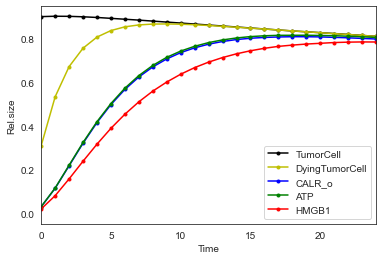

In [9]:
first = plt.figure()
plt.plot(table['PopRatio']*table['TumorCell'],'.-k',label="TumorCell")
plt.plot(table['PopRatio']*table['DyingTumorCell'],'.-y',label="DyingTumorCell")
plt.plot(table['PopRatio']*table['CALR'],'.-b',label="CALR_o")
plt.plot(table['PopRatio']*table['ATP'],'.-g',label="ATP")
plt.plot(table['PopRatio']*table['HMGB1'],'.-r',label="HMGB1")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.xlim(left=0,right=24)
plt.legend()
save_figure(first,"First_part_ICD_phen")

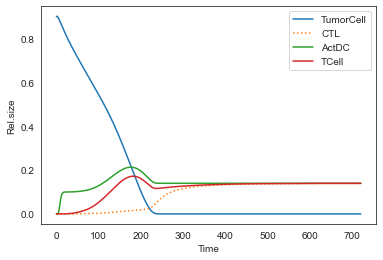

In [9]:
Tcells = plt.figure()
plt.plot(table['PopRatio']*table['TumorCell'],label="TumorCell")
plt.plot(table['PopRatio']*table['CTL'],':',label="CTL")
plt.plot(table['PopRatio']*table['ActDC'],label="ActDC")
plt.plot(table['PopRatio']*table['TCell'],label="TCell")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(Tcells,"Tcells_phen")

In [10]:
sim_noPriming = maboss.load(bnd,cfg)
sim_noPriming.param['$primingTCell'] = 0.0
bigSim_noPriming = maboss.UpdatePopulation(sim_noPriming,upp)

In [11]:
start = time.time()
res = bigSim_noPriming.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  4.42585764726003  mins


In [12]:
table = res.get_nodes_stepwise_probability_distribution(('TumorCell','ActDC','TCell','CTL'))

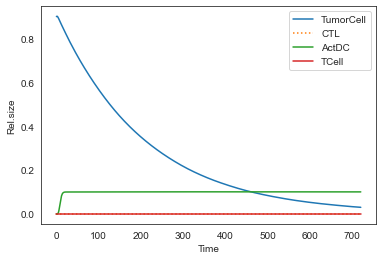

In [13]:
Tcells = plt.figure()
plt.plot(table['PopRatio']*table['TumorCell'],label="TumorCell")
plt.plot(table['PopRatio']*table['CTL'],':',label="CTL")
plt.plot(table['PopRatio']*table['ActDC'],label="ActDC")
plt.plot(table['PopRatio']*table['TCell'],label="TCell")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(Tcells,"Tcells_phen_noPriming")